In [1]:
import bioframe as bf
import matplotlib.pyplot as plt

from sponge.analysis import load_prior, compare_priors

%matplotlib inline

### Figure 1

Subfigure A presents a schematic of SPONGE, it was made using Inkscape and can be found in this folder.

Subfigures B and C show the binding motif for two versions of the Hmx3 transcription factor in the JASPAR database.
They can be accessed and downloaded [here](https://jaspar.elixir.no/matrix/MA0898.1/) and [here](https://jaspar.elixir.no/matrix/MA0898.2/).

Subfigure D shows the average change in score for the detected binding sites for the transcription factors present in both JASPAR2022 and JASPAR 2024 releases.

The required bigbed files can be retrieved from JASPAR, alternatively SPONGE downloads them by default.
They are both huge (> 100 GB), so it takes some time.
A simple way of downloading them using wget:

In [2]:
# !wget http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/JASPAR2022_hg38.bb
# !wget https://frigg.uio.no/JASPAR/JASPAR_TFBSs/2024/JASPAR2024_hg38.bb

In [3]:
JASPAR_BB_2022 = 'JASPAR2022_hg38.bb'
JASPAR_BB_2024 = 'JASPAR2024_hg38.bb'

The analysis is restricted to chromosome 19 due to the overall number of tentative binding sites in the whole genome being too large.

In [4]:
df_2022 = bf.read_bigbed(JASPAR_BB_2022, chrom='chr19')
df_2022['name_base'] = df_2022['name'].apply(lambda x: x.split('.')[0])

In [5]:
df_2024 = bf.read_bigbed(JASPAR_BB_2024, chrom='chr19')
df_2024['name_base'] = df_2024['name'].apply(lambda x: x.split('.')[0])

In [6]:
tf_2022_set = set(df_2022['name_base'].unique())
tf_2024_set = set(df_2024['name_base'].unique())
common_tfs = tf_2022_set.intersection(tf_2024_set)
s_tfs = sorted(common_tfs)

In [7]:
avg_scores_2022 = df_2022.groupby('name_base')['score'].mean()[s_tfs]
avg_scores_2024 = df_2024.groupby('name_base')['score'].mean()[s_tfs]

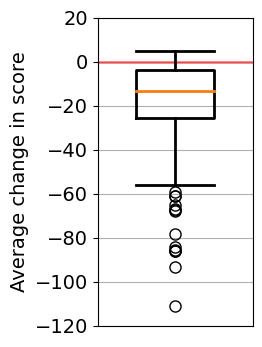

In [8]:
fig_1d,ax_1d = plt.subplots(figsize=(2,4))

lwd = {'lw': 2}
ax_1d.axhline(0, color='red', alpha=0.5, **lwd)
ax_1d.grid(axis='y')
ax_1d.boxplot(avg_scores_2024 - avg_scores_2022, widths=0.5, capwidths=0.5,
    boxprops=lwd, capprops=lwd, whiskerprops=lwd, medianprops=lwd,
    flierprops={'ms': 8})
ax_1d.set_ylim(-120, 20)
ax_1d.set_xticks([])
ax_1d.tick_params(labelsize=14)
ax_1d.set_ylabel('Average change in score', fontsize=14)

fig_1d.savefig('fig_1d.svg', dpi=300, bbox_inches='tight')

Subfigure E shows the correspondence between the motif priors generated using JASPAR2022 and JASPAR2024 releases.

These motif priors were generated using default settings except for the JASPAR version, you can download them [here](https://doi.org/10.5281/zenodo.13628785).

In [9]:
MOTIF_PRIOR_2022 = 'motif_prior_names_2022.tsv'
MOTIF_PRIOR_2024 = 'motif_prior_names_2024.tsv'

In [10]:
prior_2022 = load_prior(MOTIF_PRIOR_2022)
prior_2024 = load_prior(MOTIF_PRIOR_2024)

Statistics for the first prior:
Number of unique TFs: 692
Number of unique genes: 77077
Number of edges: 13035976
Network density: 24.44 %

Statistics for the second prior:
Number of unique TFs: 646
Number of unique genes: 77077
Number of edges: 11698461
Network density: 23.49 %

Number of common TFs: 611
Number of common genes: 77034

Network density in common TF/genes for the first prior: 25.31 %
Network density in common TF/genes for the second prior: 23.43 %

              precision    recall  f1-score   support

           0       0.95      0.97      0.96  35157062
           1       0.90      0.83      0.87  11910712

    accuracy                           0.94  47067774
   macro avg       0.92      0.90      0.91  47067774
weighted avg       0.93      0.94      0.93  47067774



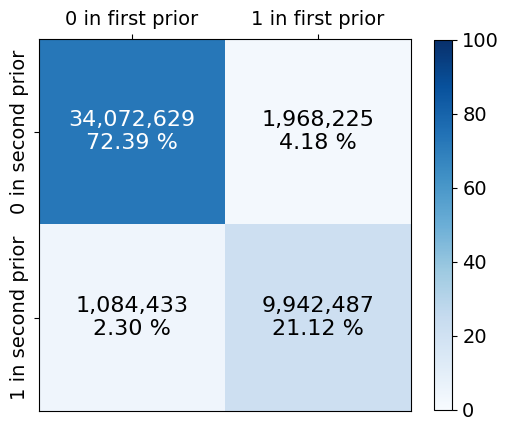

In [11]:
ax_1e = compare_priors(prior_2022, prior_2024)

ax_1e.get_figure().savefig('fig_1e.svg', dpi=300, bbox_inches='tight')